### Homework 3

*Name: Yuxuan Han*

*Net ID: yxh204*

---

### 1. Reading Data

In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pylab as plt
import statsmodels.formula.api as smf

s = json.load(open("fbb_matplotlibrc.json"))
plt.rcParams.update(s)
%matplotlib inline

//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [3]:
race_keys = {"all": 1, "white": 4, "black": 6, "asian": 8, "hispanic": 9}

allmales = {}; allfemales = {};
for race, i in race_keys.items():
    allmales[race] = pd.read_excel(io = url + "pinc08_2_1_%i.xls" %i, skiprows = 9)
    allfemales[race] = pd.read_excel(io = url + "pinc08_3_1_%i.xls" %i, skiprows = 9)

In [4]:
allfemales["all"].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [5]:
allfemales['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

---

### 2. Exploratory Analysis

In [6]:
for k,v in allfemales.items():
    print("#####", k)
    print(v.describe())
for k,v in allmales.items():
    print("#####", k)
    print(v.describe())

##### all
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean        17383.000000           2971.826087       1010.608696   
std         28945.070201           7604.959824       1190.210877   
min            84.000000              0.000000          6.000000   
25%           666.250000            136.000000         71.250000   
50%          3769.500000            773.500000        585.000000   
75%         23899.750000           1655.500000       1309.000000   
max        109956.000000          38367.000000       4298.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean        1148.869565       1470.391304         1469.478261   
std         1569.333455       2365.722680         2502.601125   
min            0.000000          2.000000            0.000000   
25%           68.000000         51.000000           

In [7]:
print (allmales['asian'].shape)
allmales['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [8]:
for gender in [allmales, allfemales]:
    for k in gender:
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
allmales["all"].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,108706.0,4407.0,2665.0,3200.0,4027.0,4418.0,3333.0,5027.0,3807.0,...,513.0,626.0,457.0,12003.0,35228.0,211.0,50779.0,447.0,0.501,0.0033
2,NaN,83555.0,3217.0,2326.0,2560.0,1964.0,3118.0,1505.0,3451.0,1959.0,...,246.0,559.0,259.0,10113.0,39903.0,437.0,54086.0,531.0,0.489,0.0039
3,NaN,78263.0,2779.0,2184.0,2419.0,1780.0,2777.0,1365.0,3149.0,1847.0,...,244.0,540.0,257.0,9392.0,40298.0,167.0,54268.0,543.0,0.483,0.0040
4,NaN,7014.0,1478.0,280.0,342.0,231.0,556.0,144.0,377.0,122.0,...,0.0,18.0,0.0,516.0,19557.0,1391.0,34247.0,1291.0,0.630,0.0092


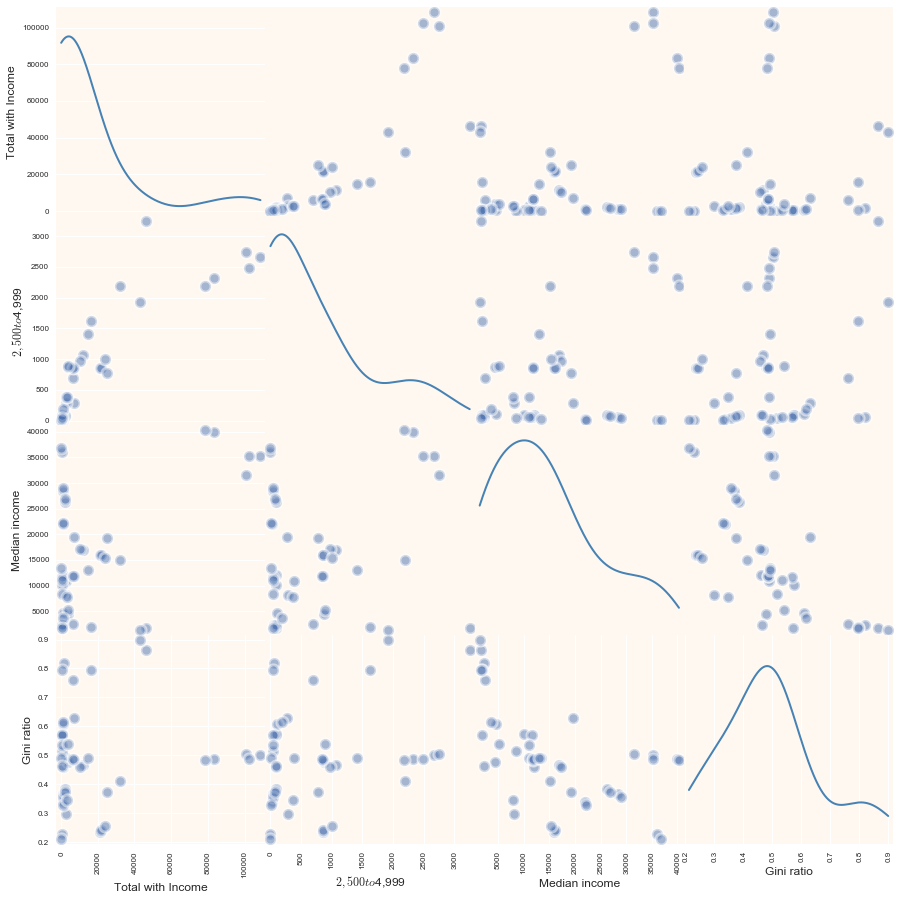

In [10]:
fig = pd.scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), diagonal='kde')

<center>*Figure 1: Scatter matrix for all male incomes*</center>

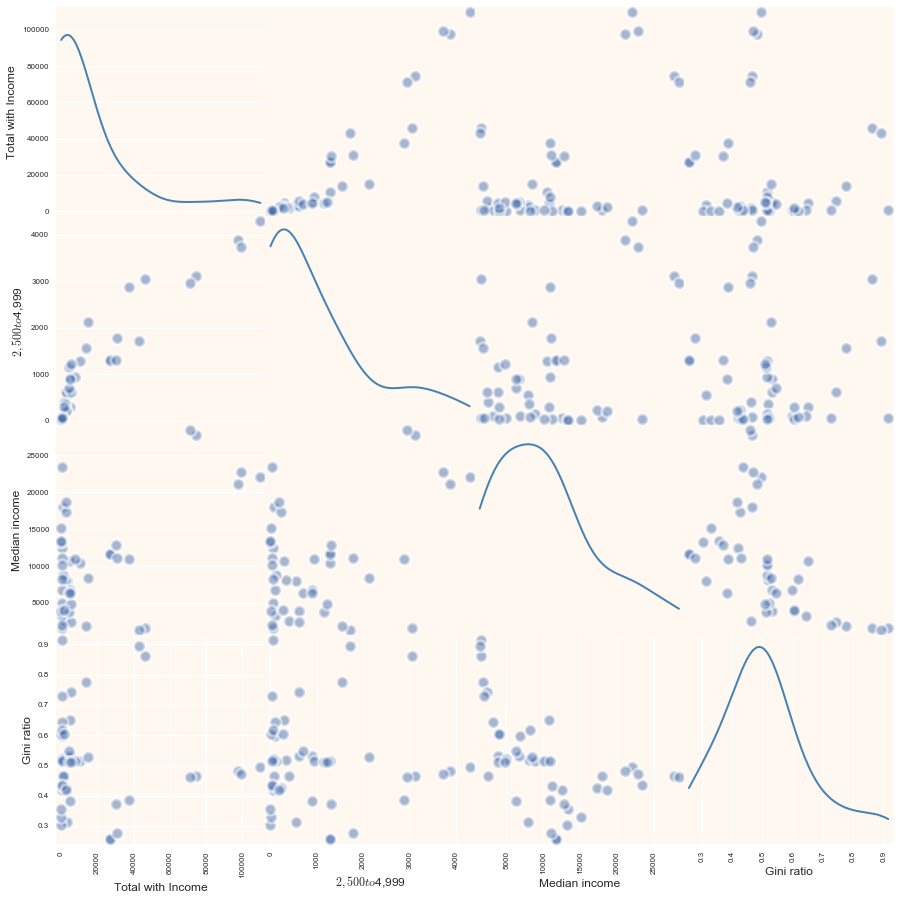

In [11]:
fig = pd.scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), diagonal='kde')

<center>*Figure 2: Scatter matrix for all female incomes*</center>

---

### 3. Visualization

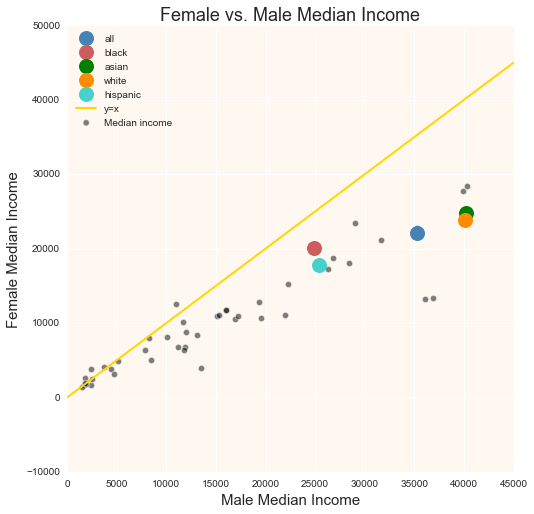

In [28]:
fig = plt.figure(figsize = (8,8)).add_subplot(111)

# Plot points and lines
for race in race_keys.keys():
    plt.plot(allmales[race]["Median income"][1], allfemales[race]["Median income"][1], 'o', ms = 15.0, label=race)
fig.scatter(allmales["all"]["Median income"], allfemales["all"]["Median income"], alpha = 0.5, c = 'k', s = 40)
fig.plot(np.linspace(0, 45000), np.linspace(0, 45000), lw = 2, label = "y=x"); fig.set_xlim(0, 45000)

# Label graph
plt.xlabel("Male Median Income", fontsize = 15); plt.ylabel("Female Median Income", fontsize = 15)
plt.title("Female vs. Male Median Income", fontsize = 18)
plt.legend(loc = 2)

plt.show()

---

### 4. Linear Regression for Total Median Income

In [13]:
all_males = np.array([0.] + [allmales[race]['Median income'][1] for race in race_keys.keys()])

all_females = np.array([0.] + [allfemales[race]['Median income'][1] for race in race_keys.keys()])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.360976045471, 0.5739482903542108)

In [14]:
income = pd.DataFrame({"male":all_males, "female":all_females})

In [15]:
lm1 = smf.ols(formula = "female ~ male", data = income).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 female   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     78.78
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           0.000890
Time:                        22:52:23   Log-Likelihood:                -53.651
No. Observations:                   6   AIC:                             111.3
Df Residuals:                       4   BIC:                             110.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1674.6927   2066.985      0.810      0.4

//anaconda/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


In [16]:
lm1_smf = lambda x: lm1.params[0] + lm1.params[1]*x

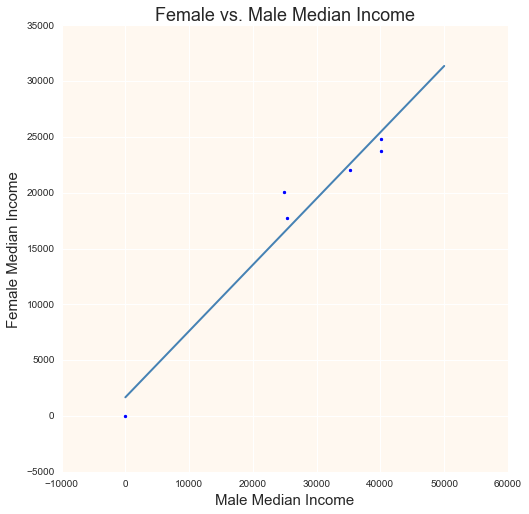

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

# Plot points and lines
plt.scatter(income.male, income.female)
x_val = np.linspace(0, ax.get_xlim()[1])
plt.plot(x_val, lm1_smf(x_val), lw = 2)

# Label graph
plt.xlabel("Male Median Income", fontsize = 15); plt.ylabel("Female Median Income", fontsize = 15)
plt.title("Female vs. Male Median Income", fontsize = 18)

plt.show()

In [18]:
lm1_ana = lambda x: beta0 + beta1*x

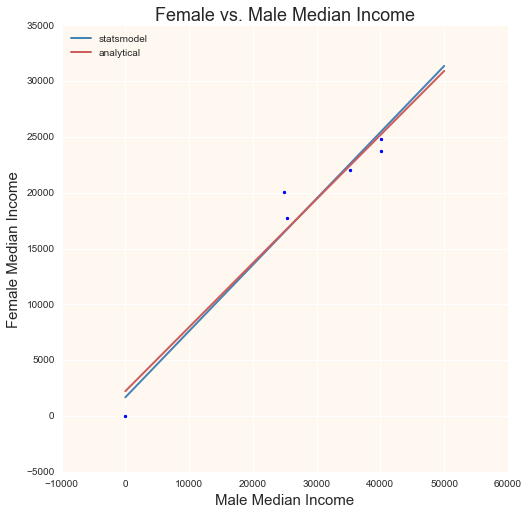

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

# Plot points and lines
plt.scatter(income.male, income.female)
x_val = np.linspace(0, ax.get_xlim()[1])
l1, = plt.plot(x_val, lm1_smf(x_val), lw = 2, label = "statsmodel")
l2, = plt.plot(x_val, lm1_ana(x_val), lw = 2, label = "analytical")

# Label graph
plt.xlabel("Male Median Income", fontsize = 15); plt.ylabel("Female Median Income", fontsize = 15)
plt.title("Female vs. Male Median Income", fontsize = 18)
plt.legend(handles = [l1, l2], loc = 2)

plt.show()

---

### 5. Linear Regression for All Sources of Income

In [20]:
all_males_allincomes = np.array(
    np.concatenate([allmales[race]['Median income'][:].values for i in race_keys]).flatten())

all_females_allincomes = np.array(
    np.concatenate([allfemales[race.format(i)]['Median income'][:].values for i in race_keys]).flatten())

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))

In [21]:
allincomes = pd.DataFrame({
        "all_female": all_females_allincomes[mask],
        "all_male": all_males_allincomes[mask]
    })

#### Analytical Solution

In [22]:
cor = stats.spearmanr(allincomes.all_male, allincomes.all_female)
beta1 = cor[0] * allincomes.all_female.std() / allincomes.all_male.std()
beta0 = allincomes.all_female.mean() - beta1 * allincomes.all_male.mean()
beta0, beta1

(383.52265551778146, 0.68837961008118698)

In [23]:
lm2_ana = lambda x: beta0 + beta1*x

#### `statsmodel` Solution

In [24]:
lm2 = smf.ols(formula = "all_female ~ all_male", data = allincomes).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             all_female   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1758.
Date:                Sun, 09 Oct 2016   Prob (F-statistic):           3.15e-82
Time:                        22:52:24   Log-Likelihood:                -1275.8
No. Observations:                 145   AIC:                             2556.
Df Residuals:                     143   BIC:                             2562.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    597.9102    234.605      2.549      0.0

In [25]:
lm2_smf = lambda x: lm2.params[0] + lm2.params[1]*x

#### Regression through 0

In [30]:
lm3 = smf.ols(formula = "all_female ~ all_male - 1", data = allincomes).fit()

In [34]:
lm2_zero = lambda x: lm3.params[0]*x

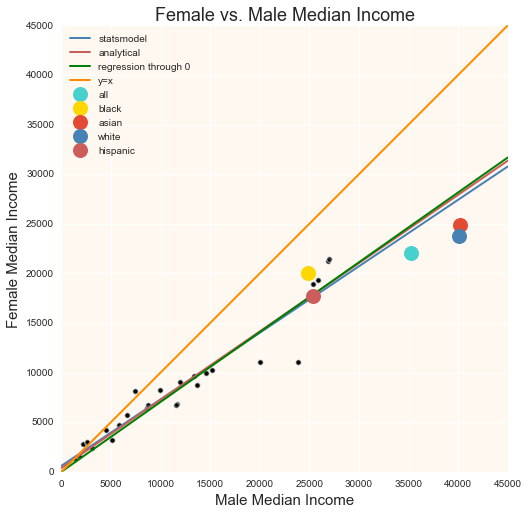

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

# Plot points and lines
ax.set_xlim(0, 45000); ax.set_ylim(0, 45000)
plt.scatter(allincomes.all_male, allincomes.all_female, s = 30, alpha = 0.5, c = 'k', label="")
x_val = np.linspace(0, ax.get_xlim()[1])
plt.plot(x_val, lm2_smf(x_val), lw = 2, label="statsmodel")
plt.plot(x_val, lm2_ana(x_val), lw = 2, label="analytical")
plt.plot(x_val, lm2_zero(x_val), lw = 2, label="regression through 0")
plt.plot(x_val, x_val, lw = 2, label = "y=x")
for race in race_keys.keys():
    plt.plot(allmales[race]["Median income"][1], allfemales[race]["Median income"][1], 'o', ms = 15.0, label=race)

# Label graph
plt.xlabel("Male Median Income", fontsize = 15); plt.ylabel("Female Median Income", fontsize = 15)
plt.title("Female vs. Male Median Income", fontsize = 18)
plt.legend(loc = 2)

plt.show()

---

### 6. Prediction

According to our prediction, when the total median income for men is \$50,000 the total median income for women is \$47,538, roughly \$2,500 less than that of men.

In [38]:
male_income = 50000
female_income = lm2_smf(male_income)
print(femlae_income)

47537.9153983


---

### 7. Comments

From this analysis, we see that while Asians and Whites earn more than Blacks and Hispanics, the income gap between genders within each range widens as the median income increases.

In [27]:
for race in race_keys.keys():
    print(race + " " + str(allmales[race]["Median income"][1] - allfemales[race]["Median income"][1]))

all 13165.0
black 4811.0
asian 15313.0
white 16342.0
hispanic 7649.0


---